<a href="https://colab.research.google.com/github/Arijit-Biswas-Anirban/Socially-Assistive-Robot-SER/blob/main/SER_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa soundfile matplotlib seaborn tqdm
!pip install torch torchvision torchaudio scikit-learn
!pip install resampy



In [ ]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA

## Load Dataset




In [ ]:
import os
DATA_PATH = "/content/drive/MyDrive/AI_Health_Assist_Robot/Audio_Speech_Actors_01-24"


In [ ]:
# Save directory in Google Drive
SAVE_DIR_PATH = "/content/drive/MyDrive/AI_Health_Assist_Robot/SER_Preprocessed"

# Create directory if it does not exist
os.makedirs(SAVE_DIR_PATH, exist_ok=True)

In [ ]:
# Emotion mapping from file names
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [ ]:
def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)
        return mfccs
    except Exception as e:
        print("Error loading file:", file_path, e)
        return None

In [ ]:
features, labels = [], []
for actor_folder in tqdm(os.listdir(DATA_PATH)):
    folder_path = os.path.join(DATA_PATH, actor_folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                emotion_id = file.split("-")[2]
                emotion = emotion_map.get(emotion_id)
                file_path = os.path.join(folder_path, file)
                mfccs = extract_features(file_path)
                if mfccs is not None:
                    features.append(mfccs)
                    labels.append(emotion)

100%|██████████| 24/24 [02:10<00:00,  5.42s/it]


In [ ]:
# Create DataFrame
df = pd.DataFrame(features)
df['label'] = labels
print(df.head(), df.shape)

            0          1          2          3          4         5  \
0 -618.059143  59.787697  -0.676535  15.620520   2.976808  4.651601   
1 -529.437317  65.158073 -15.225514  18.308821  -2.682576  1.218472   
2 -638.859863  69.315849   1.401800  17.021044   1.999277  5.125037   
3 -325.107758  47.690025 -19.080275  13.479552 -17.577957  2.367309   
4 -474.523285  60.689259 -10.590250  12.104889  -0.090703  4.684873   

           6          7          8         9  ...        31        32  \
0 -18.887867  -4.539782  -8.870209 -5.893406  ... -2.268845 -2.793136   
1 -16.652647 -10.960146 -11.489332 -2.624276  ... -3.165668 -3.808440   
2 -16.406433   0.865052  -6.116947 -2.134536  ... -2.560100 -2.533131   
3 -10.479572  -7.947028 -14.804376 -0.934522  ...  5.284975 -0.082710   
4 -14.488571  -6.431254 -15.538597 -8.137888  ...  3.448730  4.235128   

         33        34        35        36        37        38        39  \
0 -0.909425 -1.219427 -1.803406 -1.722028 -2.963042 -1.0666

/tmp/ipython-input-740823726.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


label
angry        192
calm         192
sad          192
fearful      192
disgust      192
happy        192
surprised    192
neutral       96
Name: count, dtype: int64


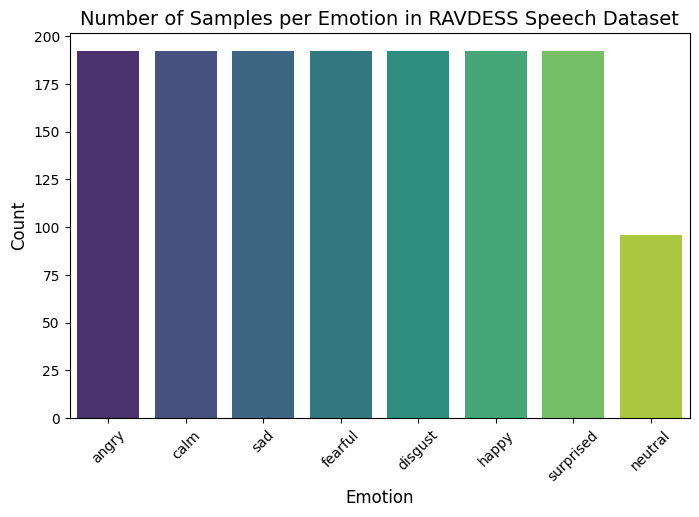

In [ ]:
# Count samples per emotion
emotion_counts = df['label'].value_counts()
print(emotion_counts)

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.title("Number of Samples per Emotion in RAVDESS Speech Dataset", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

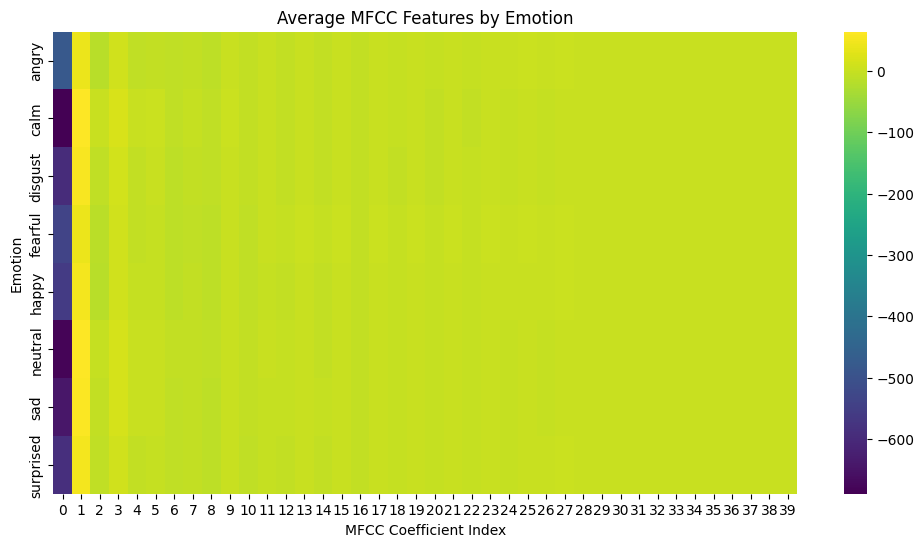

In [ ]:
# 5. EDA - Mean MFCC per Emotion
# ==========================
mean_mfcc = df.groupby('label').mean()
plt.figure(figsize=(12,6))
sns.heatmap(mean_mfcc, cmap="viridis")
plt.title("Average MFCC Features by Emotion")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Emotion")
plt.show()

In [ ]:
save_path = "/content/drive/MyDrive/AI_Health_Assist_Robot/SER_features_labels.csv"
df.to_csv(save_path, index=False)
print(f"Saved features to {save_path}")


Saved features to /content/drive/MyDrive/AI_Health_Assist_Robot/SER_features_labels.csv


In [ ]:
# Convert lists to NumPy arrays
X = np.array(features)
y = np.array(labels)


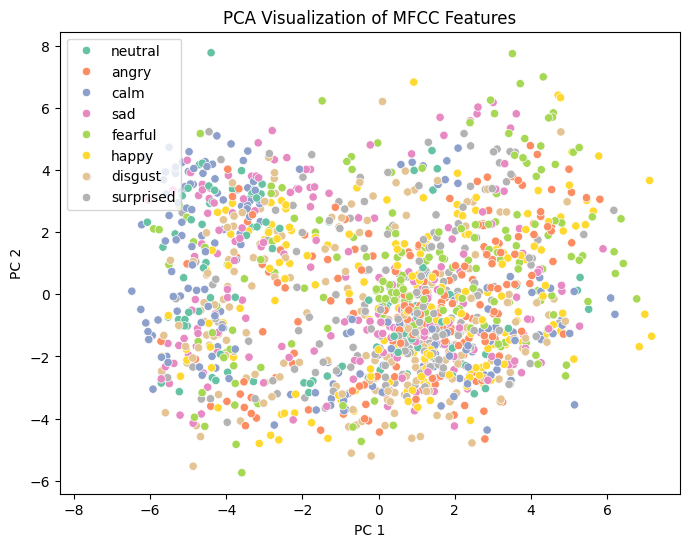

In [ ]:
# 6. EDA - PCA Visualization
# ==========================
X = np.array(features)
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set2")
plt.title("PCA Visualization of MFCC Features")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

/tmp/ipython-input-4027538482.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="emotion", y="duration", data=dur_df, palette="viridis")


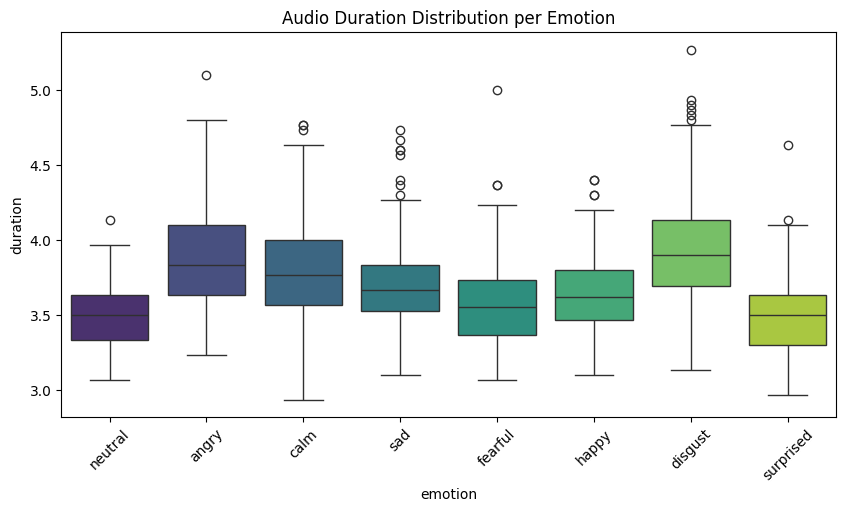

In [ ]:
# 7. EDA - Duration per Emotion
# ==========================
durations = []
for actor_folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, actor_folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                path = os.path.join(folder_path, file)
                audio, sr = librosa.load(path)
                durations.append((len(audio) / sr, emotion_map[file.split("-")[2]]))
dur_df = pd.DataFrame(durations, columns=["duration", "emotion"])
plt.figure(figsize=(10,5))
sns.boxplot(x="emotion", y="duration", data=dur_df, palette="viridis")
plt.title("Audio Duration Distribution per Emotion")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Save using joblib
joblib.dump(X, os.path.join(SAVE_DIR_PATH, 'X.joblib'))
joblib.dump(y, os.path.join(SAVE_DIR_PATH, 'y.joblib'))

print("Saved X and y to", SAVE_DIR_PATH)

Saved X and y to /content/drive/MyDrive/AI_Health_Assist_Robot/SER_Preprocessed
